In [3]:
import pandas as pd
import yfinance as yf
from datetime import timedelta, datetime

In [4]:
SYMBOLS = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'USDCHF', 'USDCAD', 'NZDUSD']
delta = timedelta(days=-300)
today = datetime.now()

In [20]:
for symbol in SYMBOLS:
    try:
        data = yf.download(symbol+'=X', today+delta)
        TEMP = data.copy(deep=True)
        TEMP = TEMP.dropna()
        TEMP.to_csv("data"+"/"+symbol+"_D1"+".csv")
    except:
        print("Unable to load data")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
import pandas as pd

symbols_data = {}
for symbol in SYMBOLS:
    SRC_DATA_FILENAME = 'data/' + symbol + '_D1.csv'
    data = pd.read_csv(SRC_DATA_FILENAME)
    data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
    data = data.dropna(subset=['Close'])
    symbols_data[symbol] = data
    print(f"\n=== {symbol} ===")
    print(data.tail())


=== EURUSD ===
          Price     Close                High                 Low  \
209  2025-04-28  1.134314   1.140823245048523   1.133105993270874   
210  2025-04-29  1.140914  1.1419566869735718  1.1371389627456665   
211  2025-04-30  1.138926  1.1398869752883911  1.1327080726623535   
212  2025-05-01  1.132490  1.1340954303741455   1.126697063446045   
213  2025-05-02  1.130327  1.1383039951324463  1.1277772188186646   

                   Open Volume  
209  1.1343141794204712      0  
210  1.1409143209457397      0  
211  1.1389262676239014      0  
212  1.1324899196624756      0  
213  1.1291780471801758      0  

=== GBPUSD ===
          Price     Close                High                 Low  \
209  2025-04-28  1.329010  1.3419395685195923  1.3281270265579224   
210  2025-04-29  1.343616  1.3442305326461792  1.3381506204605103   
211  2025-04-30  1.341079  1.3414356708526611   1.331061601638794   
212  2025-05-01  1.332392  1.3345255851745605  1.3265942335128784   
213  2025-

In [25]:
print("Loaded symbols:", symbols_data.keys())

Loaded symbols: dict_keys(['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'USDCHF', 'USDCAD', 'NZDUSD'])


In [27]:
import os

for symbol in SYMBOLS:
    file_path = f"data/{symbol}_D1.csv"
    if not os.path.exists(file_path):
        print(f"Missing file: {file_path}")

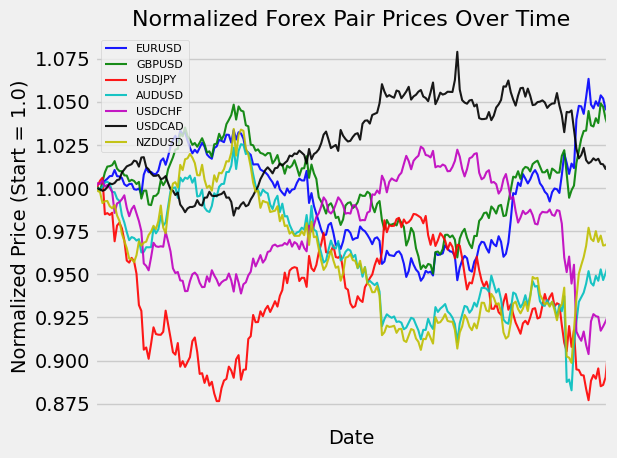

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

cycol = cycle('bgrcmky')
price_data = pd.DataFrame()

for symbol in SYMBOLS:
    try:
        data = symbols_data[symbol]
        data.index = pd.to_datetime(data.index)  # Ensure datetime index
        multiplier = 100.0 if symbol == 'USDJPY' else 1.0
        series = data['Close'].astype(float) * multiplier

        # Normalize: divide by first valid value
        normalized_series = series / series.dropna().iloc[0]

        price_data[symbol] = normalized_series
    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# Drop rows with any missing values for a clean plot
price_data = price_data.sort_index().dropna()

# Plot each symbol's normalized price series
for symbol in price_data.columns:
    price_data[symbol].plot(color=next(cycol), lw=1.5, label=symbol, alpha=0.9)

plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Normalized Price (Start = 1.0)', fontsize=14)
plt.title('Normalized Forex Pair Prices Over Time', fontsize=16)
plt.legend(prop={'size': 8})
plt.tight_layout()
plt.show()


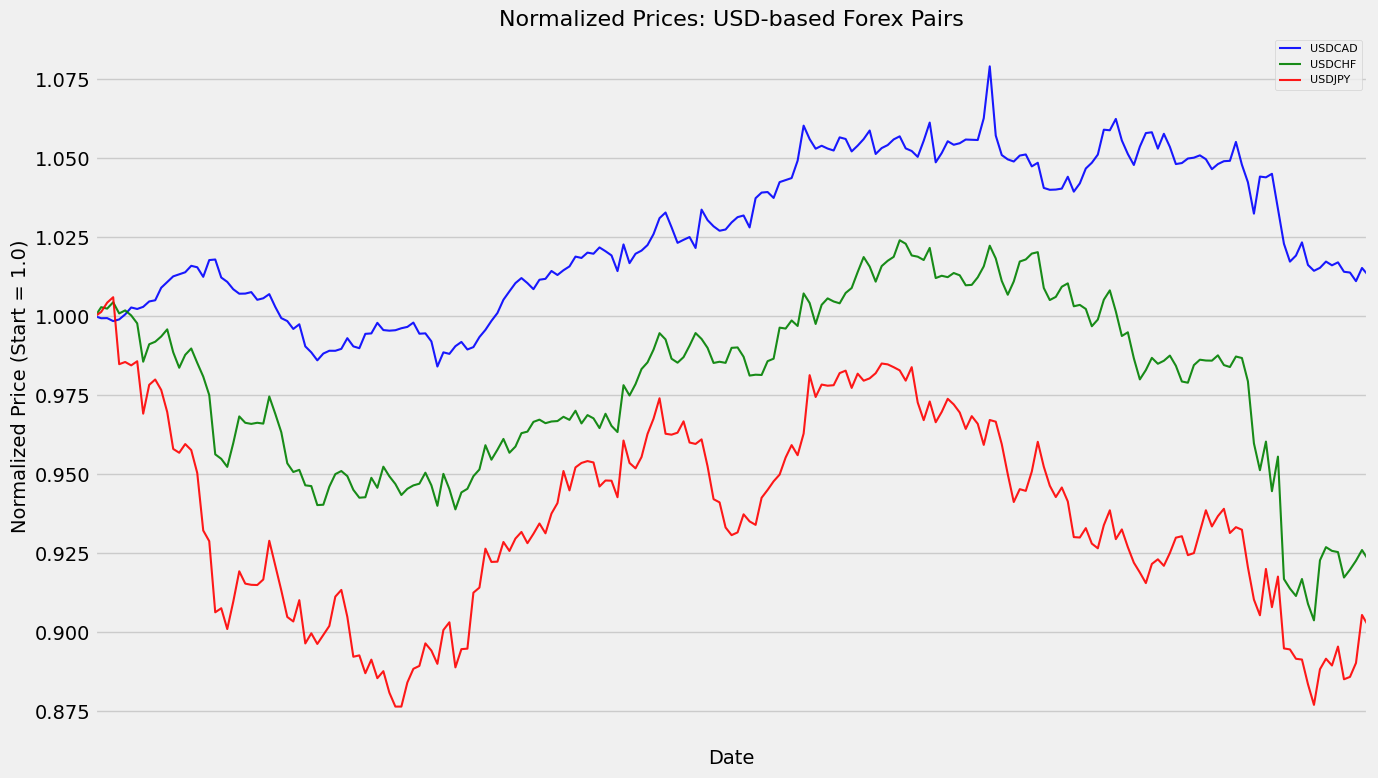

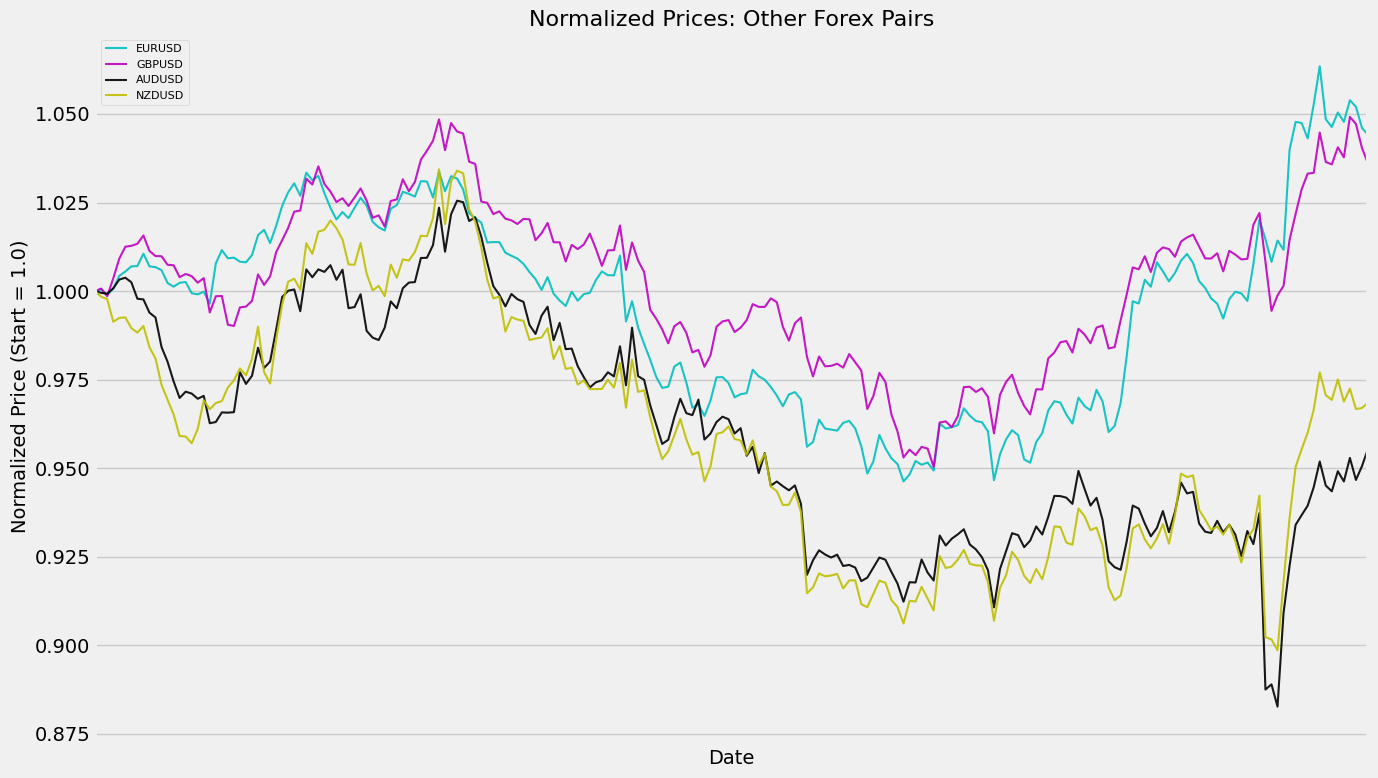

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

cycol = cycle('bgrcmky')
price_data = pd.DataFrame()
price_data_other = pd.DataFrame()

# Define separate lists for specific symbols
usd_pairs = ['USDCAD', 'USDCHF', 'USDJPY']
other_symbols = [symbol for symbol in SYMBOLS if symbol not in usd_pairs]

# Process USDCAD, USDCHF, USDJPY first
for symbol in usd_pairs:
    try:
        data = symbols_data[symbol]
        data.index = pd.to_datetime(data.index)  # Ensure datetime index
        multiplier = 100.0 if symbol == 'USDJPY' else 1.0
        series = data['Close'].astype(float) * multiplier

        # Normalize: divide by first valid value
        normalized_series = series / series.dropna().iloc[0]

        price_data[symbol] = normalized_series
    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# Process other symbols
for symbol in other_symbols:
    try:
        data = symbols_data[symbol]
        data.index = pd.to_datetime(data.index)  # Ensure datetime index
        multiplier = 1.0
        series = data['Close'].astype(float) * multiplier

        # Normalize: divide by first valid value
        normalized_series = series / series.dropna().iloc[0]

        price_data_other[symbol] = normalized_series
    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# Drop rows with any missing values for clean plots
price_data = price_data.sort_index().dropna()
price_data_other = price_data_other.sort_index().dropna()

# Plot USDCAD, USDCHF, USDJPY
plt.figure(figsize=(14, 8))
for symbol in price_data.columns:
    price_data[symbol].plot(color=next(cycol), lw=1.5, label=symbol, alpha=0.9)

plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Normalized Price (Start = 1.0)', fontsize=14)
plt.title('Normalized Prices: USD-based Forex Pairs', fontsize=16)
plt.legend(prop={'size': 8})
plt.tight_layout()
plt.show()

# Plot the rest of the forex pairs
plt.figure(figsize=(14, 8))
for symbol in price_data_other.columns:
    price_data_other[symbol].plot(color=next(cycol), lw=1.5, label=symbol, alpha=0.9)

plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Normalized Price (Start = 1.0)', fontsize=14)
plt.title('Normalized Prices: Other Forex Pairs', fontsize=16)
plt.legend(prop={'size': 8})
plt.tight_layout()
plt.show()
